# Classification de base: classer les images de vêtements


In [71]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


# Importer le jeu de données Fashion MNIST

In [72]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [73]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explorez les données

In [74]:
train_images.shape

(60000, 28, 28)

In [75]:
len(train_labels)

60000

In [76]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [77]:
test_images.shape

(10000, 28, 28)

In [78]:
len(test_labels)

10000

# Prétraitez les données

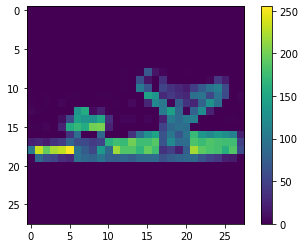

In [79]:
plt.figure()
plt.imshow(train_images[59999])
plt.colorbar()
plt.grid(False)
plt.show()

In [80]:
train_images = train_images / 255.0
test_images = test_images / 255.0

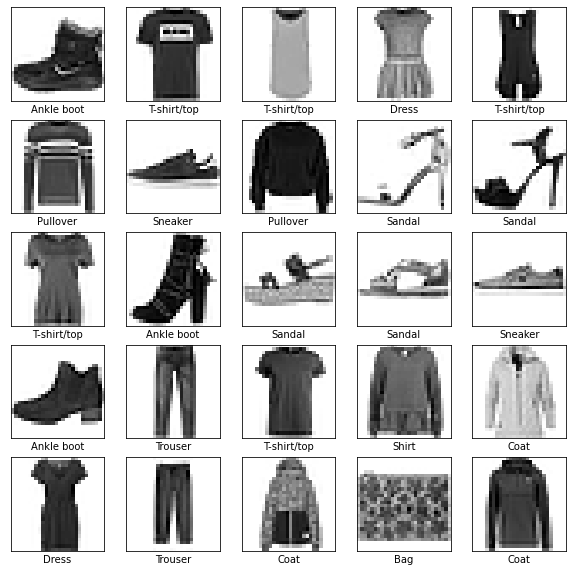

In [81]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Construisez le modèle

* Configurer les couches

In [82]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compilez le modèle

In [83]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

# Former le modèle

- La formation du modèle de réseau neuronal nécessite les étapes suivantes:

* 1 Envoyez les données d'entraînement au modèle. Dans cet exemple, les données d'apprentissage se train_images dans les tableaux train_images et train_labels .
* 2 Le modèle apprend à associer des images et des étiquettes.
* 3 Vous demandez au modèle de faire des prédictions sur un jeu de test - dans cet exemple, le tableau test_images .
* 4 Vérifiez que les prédictions correspondent aux étiquettes du tableau test_labels .

# Nourrir le modèle

In [84]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6138 - accuracy: 0.7875
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3835 - accuracy: 0.8622
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3364 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3104 - accuracy: 0.8865
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2897 - accuracy: 0.8929
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2792 - accuracy: 0.8976
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2626 - accuracy: 0.9029
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2544 - accuracy: 0.9056
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2431 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.233

# Évaluer la précision

In [85]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3588 - accuracy: 0.8744

Test accuracy: 0.8744000196456909


In [86]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [87]:
predictions = probability_model.predict(test_images)

In [88]:
predictions[0]

array([1.1910354e-07, 7.2122535e-09, 7.0454647e-09, 4.0718433e-09,
       1.9296198e-09, 3.8072777e-03, 1.4738873e-07, 3.3263214e-02,
       8.9972600e-06, 9.6292025e-01], dtype=float32)

In [89]:
np.argmax(predictions[0])

9

In [90]:
test_labels[0]

9

* Représentez-le graphiquement pour voir l'ensemble complet des 10 prédictions de classe.

In [91]:
def plot_images(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicited_label = np.argmax(predictions_array)

    thisplot[predicited_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Vérifier les prédictions

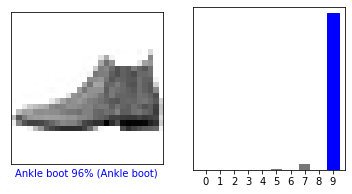

In [92]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i], test_labels)
plt.show()

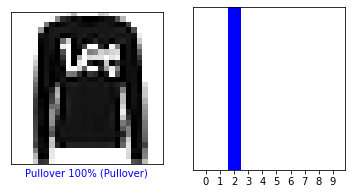

In [93]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i], test_labels)
plt.show()

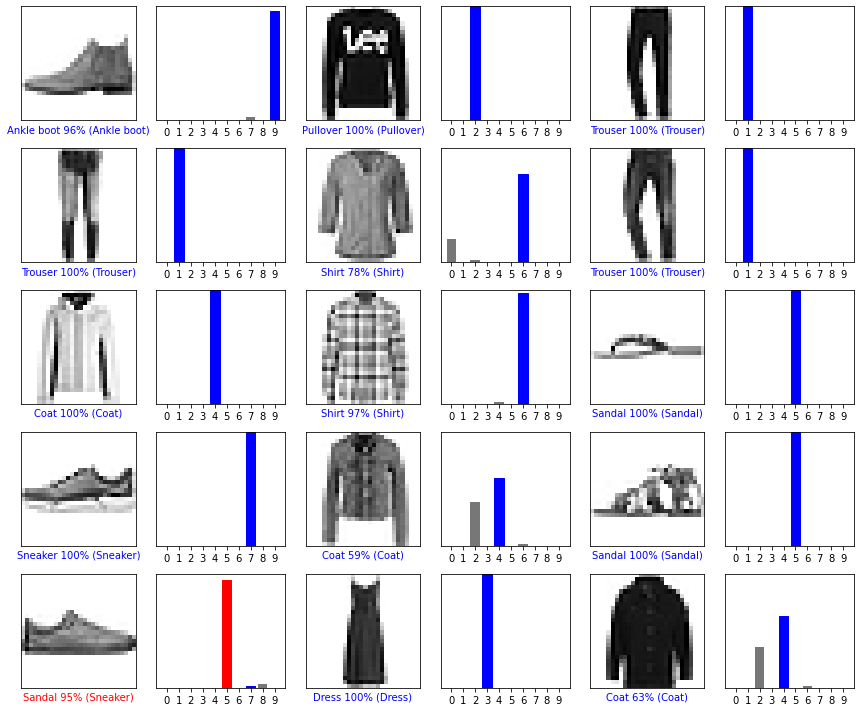

In [94]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_images(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Utilisez le modèle formé

In [113]:
img = test_images[1]

print(img.shape)

(28, 28)


In [114]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [115]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[5.4617185e-06 3.2431973e-15 9.9988961e-01 1.2977052e-15 8.1541388e-05
  1.6657003e-13 2.3347298e-05 2.9810210e-16 4.1684409e-11 5.9676563e-15]]


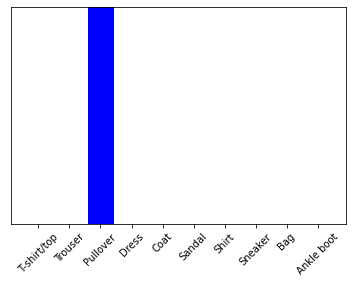

In [116]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [117]:
np.argmax(predictions_single[0])

2